<a href="https://colab.research.google.com/github/Daniel-NascimentoS/redes_neurais/blob/main/Exemplo_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo 01 - REDES NEURAIS

## Criando a Base de Dados

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
ages = np.random.randint(low = 15, high = 70, size = 40)
ages

array([53, 66, 43, 29, 57, 22, 35, 53, 33, 37, 25, 25, 38, 67, 50, 54, 38,
       17, 36, 67, 16, 38, 58, 44, 52, 16, 35, 47, 26, 36, 58, 39, 63, 41,
       56, 42, 30, 29, 61, 65])

In [2]:
labels = []
for age in ages:
    if age < 30:
        labels.append(0)
    else:
        labels.append(1)
# random swap

for i in range(0,5):
    r = np.random.randint(0,len(labels) - 1)
    if labels[r] == 0:
        labels[r] = 1
    else:
        labels[r] = 0

print(labels)


[1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1]


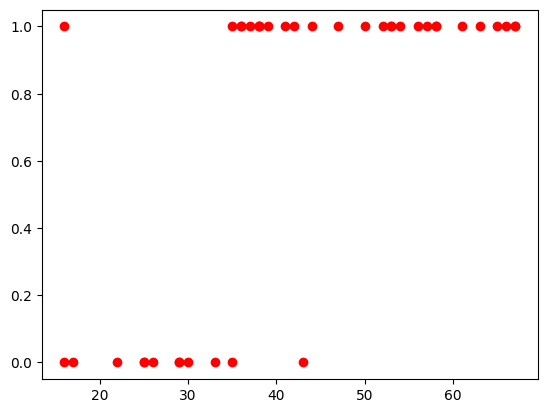

In [3]:
plt.scatter(ages, labels, color = 'red')
plt.show()

## Predição utilizando Regressão Linear

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(ages.reshape(-1,1), labels)

LinearRegression()

Utilizando a regressão linear no formato

$y = mx + b$

In [5]:
m = model.coef_[0]
b = model.intercept_
print(m,b)

0.020610430074426547 -0.17439749590754627


Encontrando o ponto em que 50% dos dados possuem maior que uma idade e 50% menor

Utilizando a seguinte equação:

<center>

$0.5 = mx + b$

$0.5-b = mx$

$x = \frac{0.5-b}{m}$


32.72117532104969


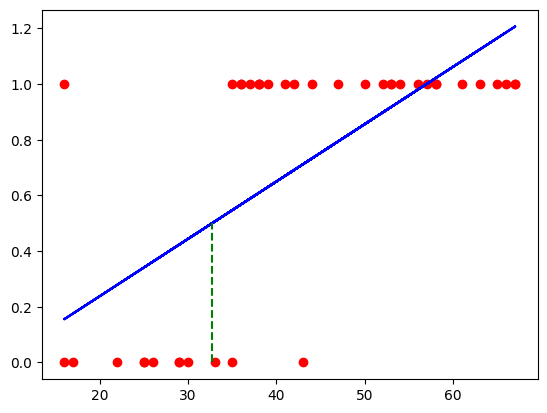

In [8]:
limiar_idade = (0.5 - b)/m
print(limiar_idade)

plt.plot(ages, ages * m + b, color = 'blue')
plt.plot([limiar_idade, limiar_idade], [0, 0.5], '--', color = 'green')
plt.scatter(ages, labels, color = 'red')
plt.show()

Como verificado acima, percebemos que a regressão linear não é a melhor opção, talvez seria interessante se trabalhassesmos com a regreção logística

## Função Logística


$y = \dfrac{1}{1+e^{-x}}$

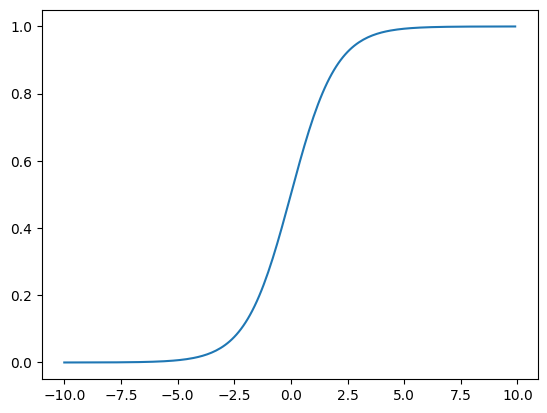

In [11]:
import math

def sigmoid(x):
    a = []
    for i in x:
        a.append(1/(1+math.exp(-i)))
    return a

x = np.arange(-10.,10.,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.show()

Utilizando o classificador Sigmóide

0.19938449461238855 -6.485366359541041
32.52693431426979


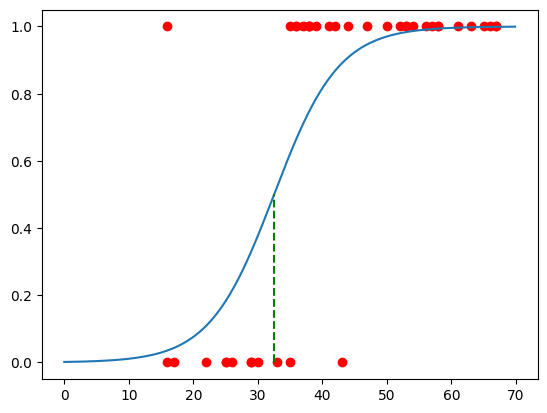

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(ages.reshape(-1,1), labels)

m = model.coef_[0][0]
b = model.intercept_[0]
print(m,b)

x = np.arange(0,70,0.1)
y = sigmoid(x * m + b)

limiar_idade = 0 - (b/m)
print(limiar_idade)

plt.plot(x,y)
plt.scatter(ages, labels, color = 'red')
plt.plot([limiar_idade, limiar_idade], [0,0.5], '--', color = 'green')
plt.show()

Para encontrar o limiar idade da seguinte forma:

$y = \dfrac{1}{1+e^{-x\prime}}$

$y = \dfrac{1}{1+e^{-mx + b}} = 0.5$

$1 + e^{-mx + b} = 2$

$0 = -mx + b$

$x = \dfrac{b}{m}$
